In [1]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [2]:
# Variables

_url = 'https://api.projectoxford.ai/vision/v1/analyses'
_key = 'b6cbbb3bdfdf4f5bb40668208a8460eb' #Here you have to paste your primary key
_maxNumRetries = 10

In [3]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [4]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""

    R = int(result['color']['accentColor'][:2],16)
    G = int(result['color']['accentColor'][2:4],16)
    B = int(result['color']['accentColor'][4:],16)

    cv2.rectangle( img,(0,0), (img.shape[1], img.shape[0]), color = (R,G,B), thickness = 25 )

    if 'categories' in result:
        categoryName = sorted(result['categories'], key=lambda x: x['score'])[0]['name']
        cv2.putText( img, categoryName, (30,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3 )

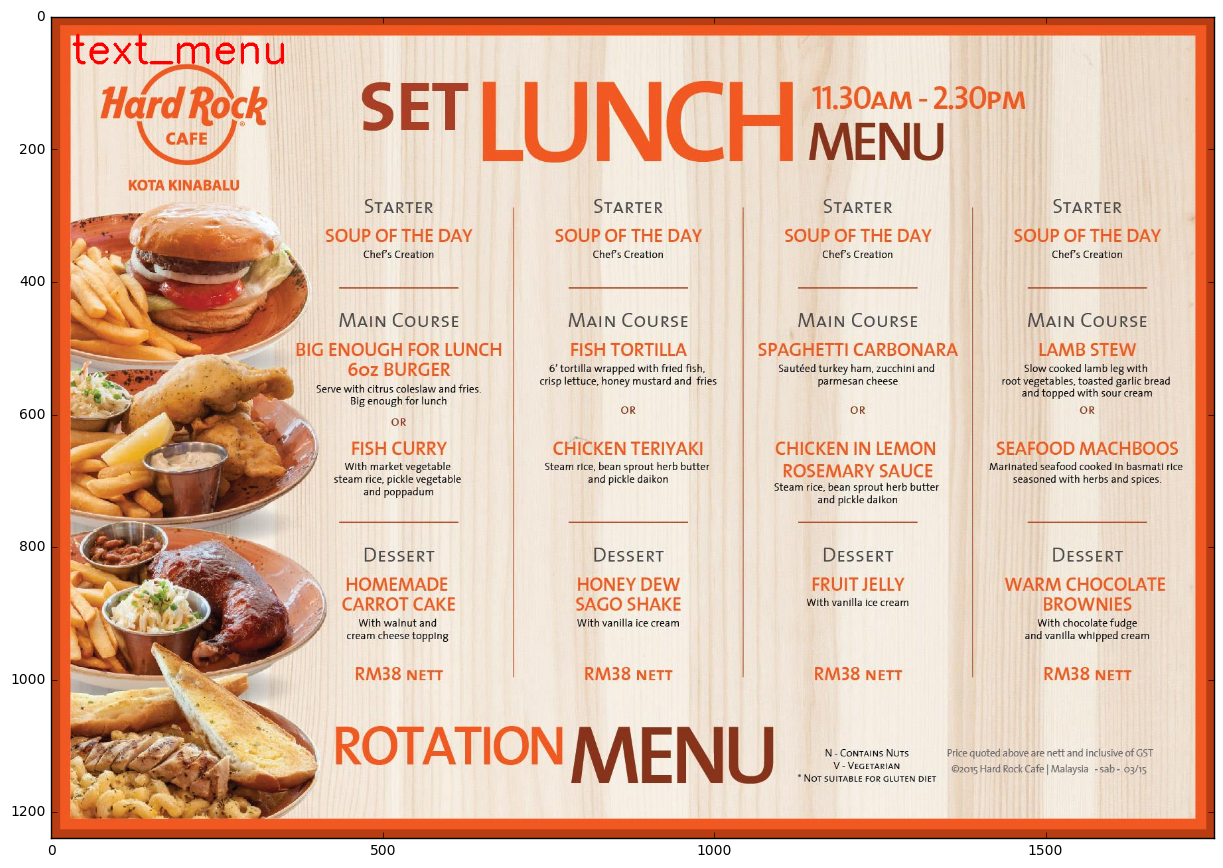

In [5]:
# URL direction to image
urlImage = 'http://www.hardrock.com/cafes/kota-kinabalu/files/2387/11722492_972276956137622_4057318830125047649_o.jpg'

# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

a man swimming in a pool of water
people_swimming
water sport
Male
{u'categories': [{u'name': u'people_swimming', u'score': 0.98046875}],
 u'color': {u'accentColor': u'19A4B2',
            u'dominantColorBackground': u'White',
            u'dominantColorForeground': u'Grey',
            u'dominantColors': [u'White'],
            u'isBWImg': False},
 u'description': {u'captions': [{u'confidence': 0.7850108124440484,
                                 u'text': u'a man swimming in a pool of water'}],
                  u'tags': [u'water',
                            u'sport',
                            u'swimming',
                            u'pool',
                            u'man',
                            u'riding',
                            u'blue',
                            u'top',
                            u'ocean',
                            u'young',
                            u'wave',
                            u'bird',
                            u'game',
          

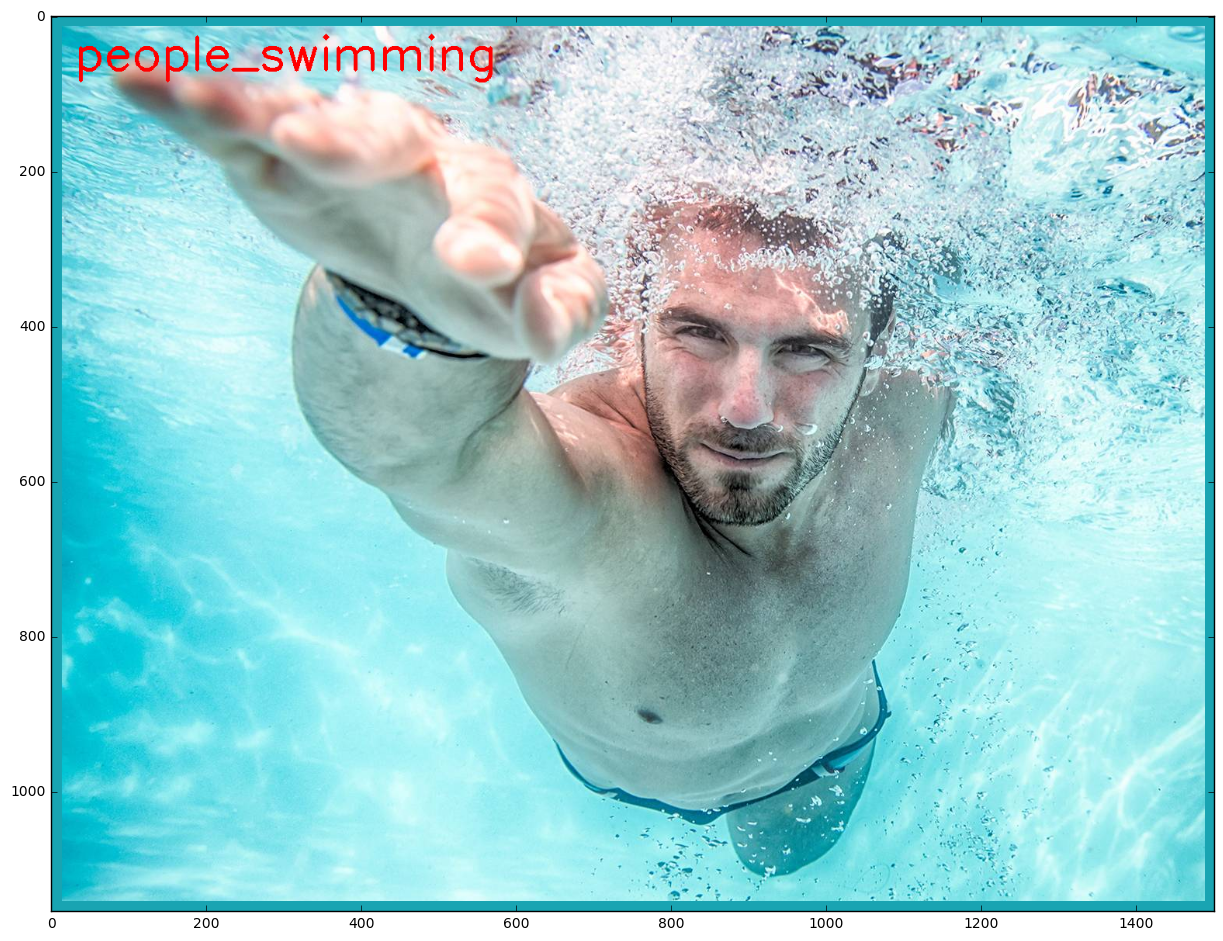

In [30]:
import pprint as pp

# Load raw image file into memory
pathToFileInDisk = r'C:\Users\Administrator\Desktop\1.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()
    
# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories,Faces,Tags,Description'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

result = processRequest( json, data, headers, params )

categoryName = sorted(result['categories'], key=lambda x: x['score'])[0]['name']
tags = sorted(result['tags'], key=lambda x: x['confidence'])[0]['name']
gender = sorted(result['faces'], key=lambda x: x['gender'])[0]['gender']
age = sorted(result['faces'], key=lambda x: x['gender'])[0]['gender']

print(result['description']['captions'][0]['text'])
print(categoryName)
print(tags)
print(gender)
pp.pprint(result)

if result is not None:
    # Load the original image, fetched from the URL
    data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )